<a href="https://colab.research.google.com/github/JhonysIV/SenalesAndSistemas/blob/main/Taller%20clase%20slit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución de SLIT segundo orden forma canónica utilizando transformada de Laplace en Sympy
Aplicación de fracciones parciales

In [2]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [3]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)

# Entrada de interés en Laplace
X = 1 # X(s) = 1 Respuesta entrada impulso; X(s) = 1/s resp escalón, X(s) = 1/s**2 resp a la rampa

# -----------------------------------------------------
# NUEVA FUNCIÓN DE TRANSFERENCIA (Forma no canónica)
# H(s) = 1 / (LC*s**2 + RC*s + 1)
# -----------------------------------------------------

# Se define la función de transferencia directamente según la ecuación del usuario
# H(s) = 1 / (1 + RCs + LCs**2)
H = 1/(1 + R*C*s + L*C*s**2)

# Si quieres manipular la forma canónica para la misma ecuación:
# K = 1 #ganancia estática
# wn = sym.sqrt(1/(C*L)) #frecuencia natural (omega_n)
# xi = R*C*wn / 2 #factor amortiguamiento (xi)
# H_canonica = K*(wn**2/(s**2 + 2*xi*wn*s + wn**2))
# La forma simple H = 1/(1 + R*C*s + L*C*s**2) es la más directa.

# Hlc = H/(1+H) #para lazo cerrado (Esto ya no aplica a la nueva H(s))

H

        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

In [6]:
#calcular polos
s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)

# Coeficientes del polinomio denominador: P(s) = LCs^2 + RCs + 1
a = L*C
b = R*C
c = 1

# Se utiliza la fórmula cuadrática para encontrar las raíces (polos) de P(s) = 0
# s = (-b +/- sqrt(b**2 - 4*a*c)) / (2*a)

# Polo 1 (usando el signo +)
p1 = (-b + sym.sqrt(b**2 - 4*a*c)) / (2*a)

# Polo 2 (usando el signo -)
p2 = (-b - sym.sqrt(b**2 - 4*a*c)) / (2*a)

# Muestra el primer polo simbólico
p1

          _______________
         ╱  2  2         
-C⋅R + ╲╱  C ⋅R  - 4⋅C⋅L 
─────────────────────────
          2⋅C⋅L          

In [13]:
#evaluar valores RLC
s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)

# Define la función de transferencia H(s) para tu circuito RLC
H = 1/(1 + R*C*s + L*C*s**2)

# Valores correctos a evaluar (en unidades base)
# R = 1000 Ohms
# L = 180e-6 Henrys (0.000180 H)
# C = 120e-6 Farads (0.000120 F)
RLC_actuales = {
    R: sym.Float(1000),
    L: sym.Float(180e-6),
    C: sym.Float(120e-6)
}

# Sustituir los valores en H(s)
H_numerica = H.subs(RLC_actuales)

H_numerica

           1           
───────────────────────
         2             
2.16e-8⋅s  + 0.12⋅s + 1

In [26]:
print('p1 =', p1.subs(RLC_actuales))
print('p2 =', p2.subs(RLC_actuales))
print('xi =', xi.subs(RLC_actuales))
print('omega_n =', wn.subs(RLC_actuales))

p1 = -5555547.22220972
p2 = -8.33334583370015
xi = 408.248290463863
omega_n = 6804.13817439772


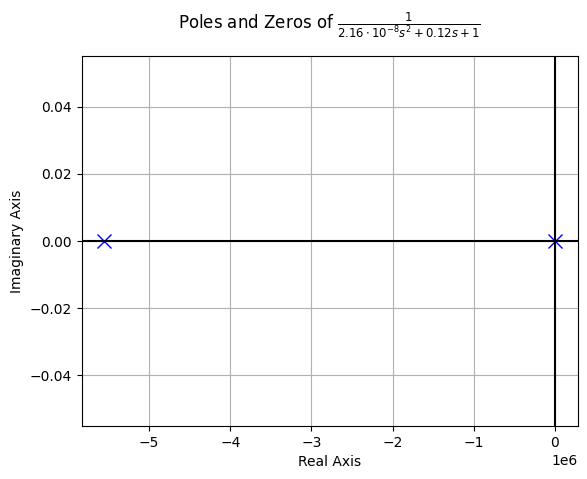

In [29]:
# Importar las librerías necesarias para el control
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot

# 2. Extraer el numerador (num) y denominador (den)
# La función sym.fraction divide la expresión en (numerador, denominador)
num, den = sym.fraction(H_numerica)

# 3. Crear el objeto TransferFunction
# Se requiere el numerador, denominador y la variable de Laplace 's'
tf1 = TransferFunction(num, den, s)

# 4. Graficar los polos y ceros
# El argumento figsize es opcional, pero ayuda a que el gráfico se vea mejor.
pole_zero_plot(tf1, figsize=(6, 6))

In [30]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

In [37]:
# 2. Descomponer la función de salida en Laplace usando fracciones parciales
Yp = Y.apart(s)
# Función de salida en Laplace factorizada
Yp

           1.0           
─────────────────────────
         2               
2.16e-8⋅s  + 0.12⋅s + 1.0

In [40]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

                  -2777777.77777778⋅t                         
16.6667166668917⋅ℯ                   ⋅sinh(2777769.44443194⋅t)

In [41]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(RLC).apart(s)
Ye


           1.0           
─────────────────────────
         2               
2.16e-8⋅s  + 0.12⋅s + 1.0

In [45]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

                  -2777777.77777778⋅t                         
16.6667166668917⋅ℯ                   ⋅sinh(2777769.44443194⋅t)

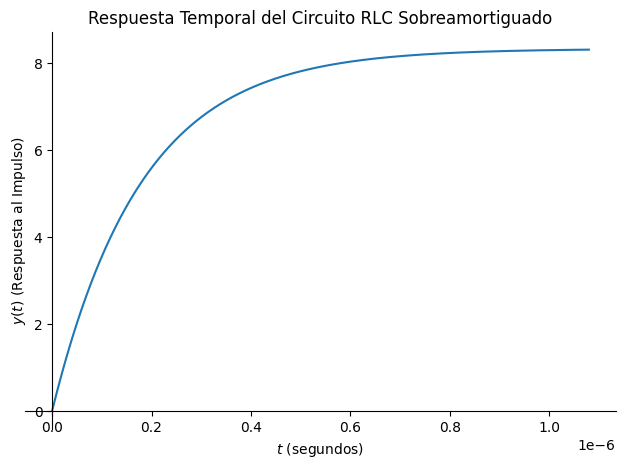

In [51]:
# 1. Calcular el tiempo final para la gráfica (3/xi*wn)
# El tiempo de establecimiento es Ts = 3/(xi*wn) o 4/(xi*wn)
tiempo_final_simbolico = 3 / (xi * wn)

# Sustituir los valores RLC y convertir a float para usarlo como límite de plot
# Nota: Usamos la misma notación RLC del código original.
RLC = RLC_actuales
t_final_numerico = float(tiempo_final_simbolico.subs(RLC))

# 2. Generar y mostrar la gráfica
# sym.plot es la función de SymPy para graficar expresiones simbólicas
sym.plot(
    yt,
    (t, 0, t_final_numerico), # Rango de tiempo: (variable, inicio, fin)
    xlabel='$t$ (segundos)',
    ylabel='$y(t)$ (Respuesta al Impulso)',
    title='Respuesta Temporal del Circuito RLC Sobreamortiguado'
)

# plt.show() # sym.plot usualmente muestra la gráfica por sí mismo,
             # pero lo dejamos si fuera necesario en tu entorno específico.